In [1]:
import itertools
import scipy.io as sio
import numpy as np
import scipy.ndimage.filters as filters
import scipy.ndimage.morphology as morphology
import matplotlib.pyplot as plt
import os

from scipy import stats

In [20]:
def get_data(data):
    data_array = []
    for row in data['data']['Model_Rs'][0, 0]['R_CV'][0, :]:#[0, 0]:
        data_array.append(row)
    return np.array(data_array).squeeze()


def Analyze_max_sample(data):
    # return (get_data(data).argmax(axis=1))
    return (get_data(data).max(axis=1))
    # return (get_data(data)[:, 1])
    

In [21]:
Model_Mode = 'IC' #["IC", "Channels", "Periods", "Time"];

Modality = 'EEGfMRI' #'EEGfMRI' 'MMEG'; # EEG2 EEG MEG GMEG GMEG2 GMEG3
# Modality = 'MMEG'

if Modality == 'MMEG':
    
    Subjects_list = list(range(1, 18+1));
    Tasks_list = [4] # [1, 2] # list(range(1, 2 + 1));
    Task_name = {4: 'Auditory'}

elif Modality == 'EEGfMRI':

    Subjects_list = list(range(1, 17+1));
    Tasks_list = [1, 2] # list(range(1, 2 + 1));
    Task_name = {1: 'Auditory', 2: 'Visual'}

else:
    pass

Learn_methods_list = ["transition"] #, "frequency"];
SurpriseMethods_list = ["KL2", "LOG", "PUZ"];
# ['early', 'mmn', 'p300', 'all', 'signal']
Periods_list = ["IC"];

csv_dir = f'csv_reports_{Modality}'
if not os.path.exists(csv_dir):
    os.makedirs(csv_dir)
    
surprie_dict = {
    'KL2': 'Bayesian',
    'LOG': 'Shannon',
    'PUZ': 'Confidence-corrected',
}

In [22]:
decoding_powers = {}
for SurpriseMethod in SurpriseMethods_list:
    for Period in Periods_list:
        for learn_method in Learn_methods_list:
            for TaskNumber in Tasks_list:
                res = []
                for Sub in Subjects_list:
                    filename = f'Run_Model_{Modality}_{Model_Mode}_Subject{Sub:02}_Task{TaskNumber}_{learn_method}_{SurpriseMethod}_{Period}.mat'
                    filepath = filepath = os.path.join('..', 'Output', f'{Modality}_{Model_Mode}', filename)
                    data = sio.loadmat(filepath)

                    res.append(Analyze_max_sample(data))
                    
                res = np.asarray(res)
                decoding_powers[f'{Period}_{SurpriseMethod}_{TaskNumber}_{learn_method}'] = res


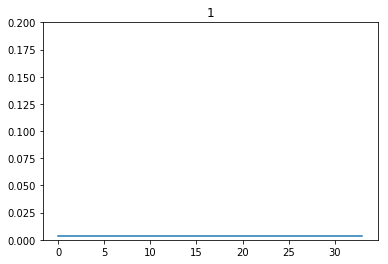

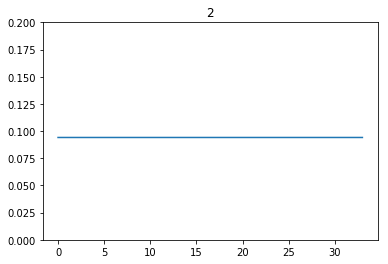

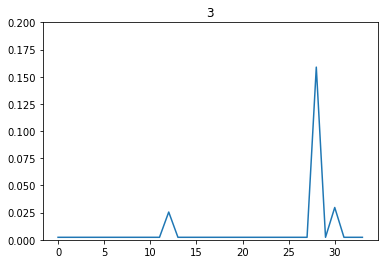

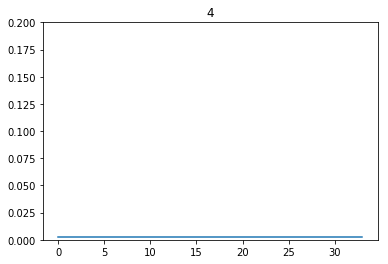

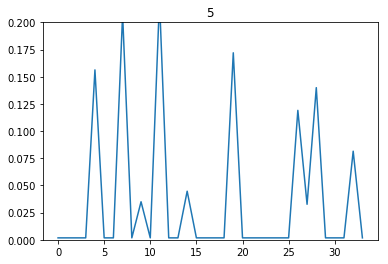

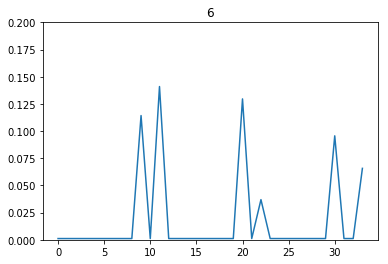

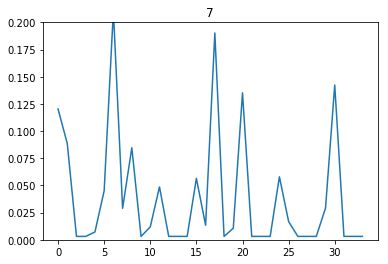

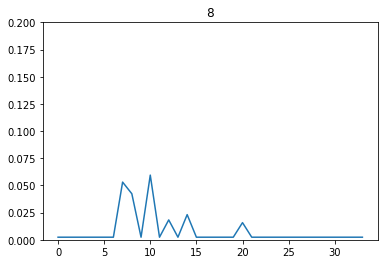

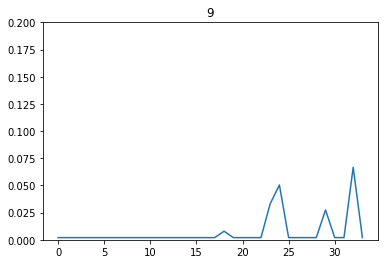

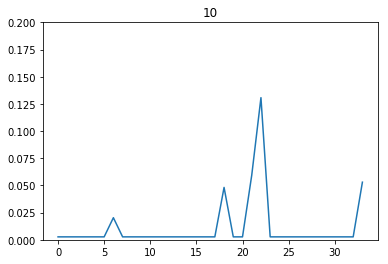

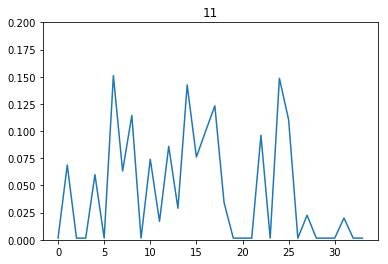

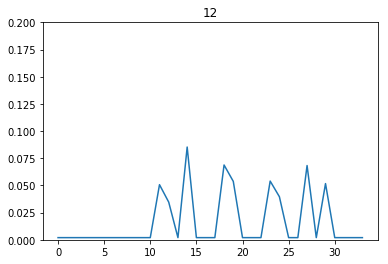

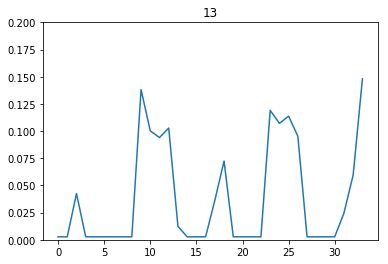

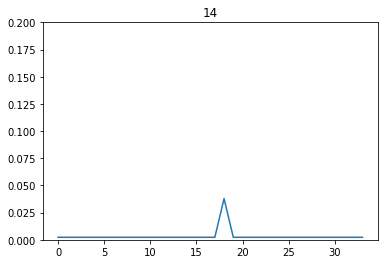

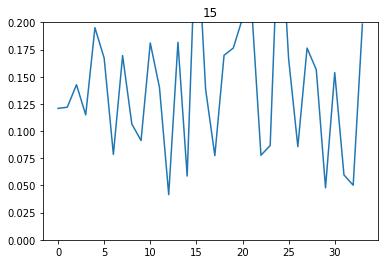

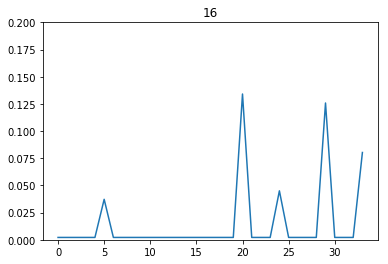

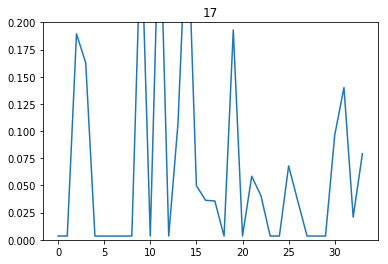

In [34]:
for i in range(17):
    plt.plot(decoding_powers['IC_KL2_1_transition'][i, :])
    plt.ylim([0, 0.2])
    plt.title(i+1)
    plt.show()

In [36]:
A = decoding_powers['IC_KL2_1_transition'][1, :]
A.max()-A.min()

2.1555058009364444e-08